In [2]:
#!pip install nltk
!pip install beautifulsoup4

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk import word_tokenize, pos_tag, ne_chunk


In [4]:
# Download the 'maxent_ne_chunker' resource
import nltk

# Download the 'maxent_ne_chunker' resource
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [120]:
from src.common_basis import *

i = load_incel_parquet()

In [121]:
s = i.incel_posts

# Take a sample DataFrame
temp = s.head(1000)

# Make a new column to clean up
temp['post_content_clean'] = temp['post_html']

# Redundant
data = temp.post_content.sample(1000)

df = pd.DataFrame(data)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_49309/3918170284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['post_content_clean'] = temp['post_html']


In [122]:
%%time
# remove HTML shit. DOESN't work
from bs4 import BeautifulSoup

temp['post_content_clean'] = temp['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

temp['post_content_clean']

CPU times: user 535 ms, sys: 38.5 ms, total: 573 ms
Wall time: 624 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      Or maybe she just realized Chad will never com...
1      Ofc Chad will never commit to a crazy bpd toilet.
2         Ill give her a ride in exchange for some head.
3      A man doing the same thing would have been sub...
4                                         Indeed, it is.
                             ...                        
995          I think if any of them will come back again
996                 The time has come. Execute Order 66.
997                  7 days before you pull the trigger?
998       My brain hurts from reading your conversation.
999                                           u r mother
Name: post_content_clean, Length: 1000, dtype: object

In [123]:
# Remove stop words
stop_words = set(stopwords.words('english'))

In [124]:
%%time
# Remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

temp.post_content_clean = temp.post_content_clean.apply(remove_stop_words)

CPU times: user 95.5 ms, sys: 8.59 ms, total: 104 ms
Wall time: 110 ms


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [125]:
%%time
# Remove special symbols from 'post_content' column
import re

temp['post_content_clean'] = temp['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

CPU times: user 2.51 ms, sys: 499 µs, total: 3.01 ms
Wall time: 2.66 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [126]:
%%time
# Remove named entities from 'post_content' column
def remove_named_entities(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    entities = nltk.ne_chunk(tagged, binary=True)
    filtered_tokens = [t[0] for t in entities if not isinstance(t, nltk.tree.Tree)]
    return ' '.join(filtered_tokens)

temp['post_content_clean'] = temp['post_content_clean'].apply(remove_named_entities)

temp

CPU times: user 789 ms, sys: 155 ms, total: 944 ms
Wall time: 1.05 s


<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,maybe realized Chad never commit
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,Chad never commit crazy bpd toilet
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,give ride exchange head
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,Indeed
...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,think come back
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,time come Order 66
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,7 days pull trigger
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,brain hurts reading conversation


In [127]:
# Function to remove one-letter long words
def remove_one_letter_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

# Apply the function to the 'post_content' column
temp['post_content_clean'] = temp['post_content_clean'].apply(remove_one_letter_words)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_49309/1927914125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['post_content_clean'] = temp['post_content_clean'].apply(remove_one_letter_words)


In [128]:
%%time
# Word usage statistics
def get_word_usage(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    return fdist

temp['word_usage'] = temp.post_content_clean.apply(get_word_usage)

CPU times: user 68.4 ms, sys: 4.12 ms, total: 72.6 ms
Wall time: 72.3 ms


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [129]:
%%time
# Extract main topics
def extract_main_topics(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    noun_phrases = []
    for word, tag in pos_tags:
        if 'NN' in tag:
            noun_phrases.append(lemmatizer.lemmatize(word, pos='n'))
    return noun_phrases

temp['main_topics'] = temp.post_content_clean.apply(extract_main_topics)

# Output the DataFrame with results
print(temp)


     post_id   post_id_str  poster_id          time_posted   
0          1  post-8897672          0  2022-06-02 01:02:35  \
1          2  post-8897678          1  2022-06-02 01:04:16   
2          3  post-8897741          2  2022-06-02 01:12:32   
3          4  post-8897798          0  2022-06-02 01:20:35   
4          5  post-8898099          3  2022-06-02 02:25:56   
..       ...           ...        ...                  ...   
995     1464  post-4357043         34  2020-04-20 22:01:52   
996     1465   post-240785        235  2018-01-21 16:12:26   
997     1469   post-240823        456  2018-01-21 16:22:55   
998     1488   post-241149        438  2018-01-21 17:47:19   
999      759  post-3663857        101  2020-01-17 16:02:47   

                                          post_content   
0    Or maybe she just realized Chad will never com...  \
1    Ofc Chad will never commit to a crazy bpd toilet.   
2       Ill give her a ride in exchange for some head.   
3    A man doing the sa

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [130]:
temp

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,maybe realized Chad never commit,"{'maybe': 1, 'realized': 1, 'Chad': 1, 'never'...",[Chad]
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,Chad never commit crazy bpd toilet,"{'Chad': 1, 'never': 1, 'commit': 1, 'crazy': ...","[Chad, bpd, toilet]"
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,give ride exchange head,"{'give': 1, 'ride': 1, 'exchange': 1, 'head': 1}","[ride, exchange, head]"
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...,"{'man': 1, 'thing': 1, 'would': 1, 'subdued': ...","[man, thing, officer, peace, world]"
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,Indeed,{'Indeed': 1},[]
...,...,...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,think come back,"{'think': 1, 'come': 1, 'back': 1}",[think]
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,time come Order 66,"{'time': 1, 'come': 1, 'Order': 1, '66': 1}","[time, Order]"
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,days pull trigger,"{'days': 1, 'pull': 1, 'trigger': 1}","[day, trigger]"
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,brain hurts reading conversation,"{'brain': 1, 'hurts': 1, 'reading': 1, 'conver...","[brain, hurt, conversation]"


<Figure size 1000x600 with 0 Axes>

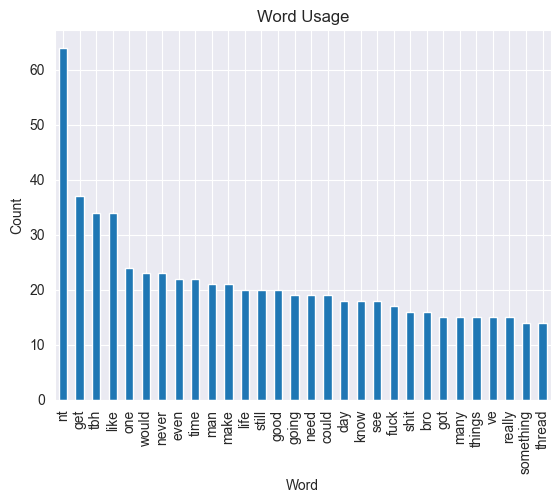

In [131]:
# Visualize the word use
import matplotlib.pyplot as plt


word_usage = temp['word_usage'].sum()
word_df = pd.DataFrame.from_dict(word_usage, orient='index', columns=['Count'])
word_df = word_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

### Now visualize topics based on users


In [168]:
import pandas as pd
import matplotlib.pyplot as plt

s = i.incel_users
# covert date to numeric
s.user_joined = pd.to_datetime(s.user_joined)


# Select users who joined during first year
start_date = '2018-01-01'
end_date = '2018-03-01'
mask_old = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)
#print(s.loc[mask])

#save ID's of old users:
old_users = s.user_id.loc[mask_old].to_list()

# Select users who joined last year
mask_new = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)

#save ID's of new users:
new_users = s.user_id.loc[mask_new].to_list()

test
test


/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_49309/3319253000.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['time_posted'] = pd.to_datetime(temp['time_posted'])


ValueError: x and y must be the same size

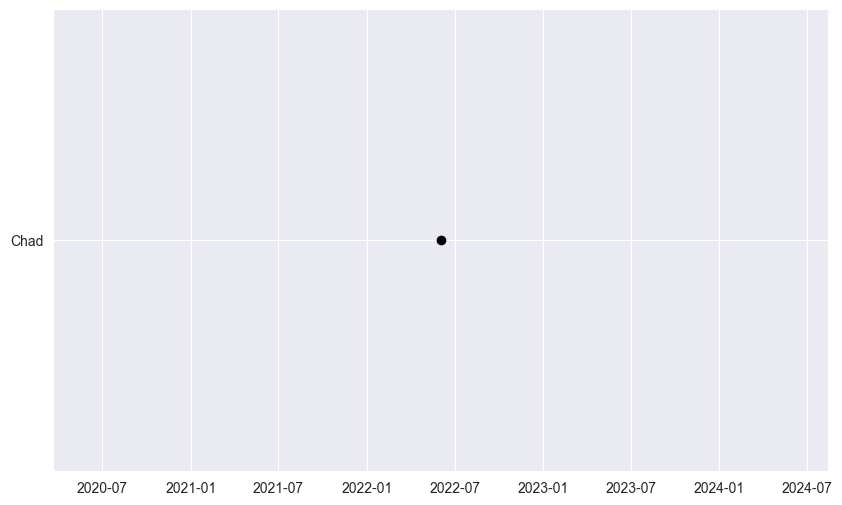

In [170]:
# Assuming you have the 'temp' dataframe with the required columns

# Function to assign color based on user ID
def get_color(poster_id):
    if poster_id in old_users:
        return 'red'
    elif poster_id in new_users:
        return 'blue'
    else:
        return 'black'  # Default color

# Convert 'time_posted' column to datetime
temp['time_posted'] = pd.to_datetime(temp['time_posted'])

# Plotting the topics over time
plt.figure(figsize=(10, 6))
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['main_topics'], c=get_color(row['poster_id']))

plt.xlabel('Time Posted')
plt.ylabel('Main Topics')
plt.title('Topics over Time')

# Show the legend for color coding
plt.legend(['CSV File 1', 'CSV File 2'])

# Display the plot
plt.show()


test
test
test
test
test


ValueError: x and y must be the same size

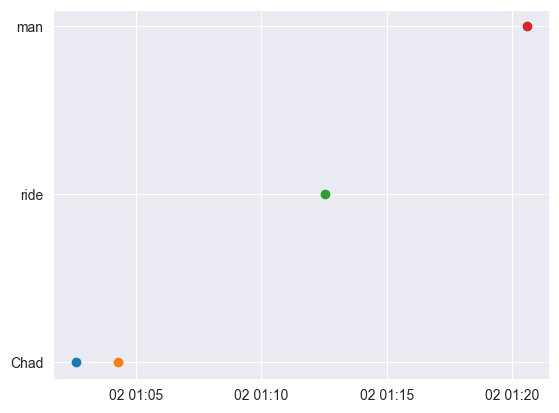

In [181]:
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['top_topic'])

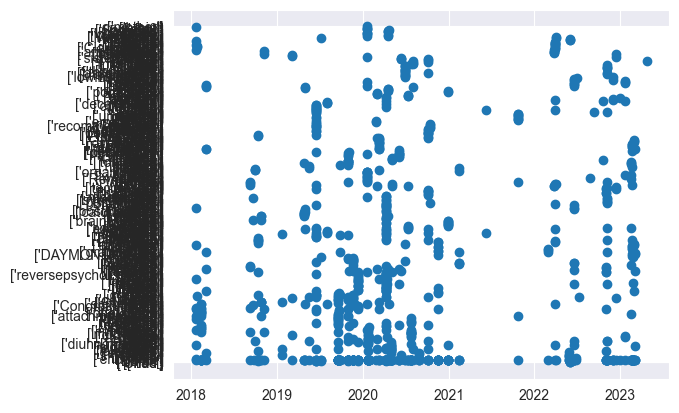

In [185]:
plt.scatter(temp.time_posted, temp.top_topic.astype(str))

In [180]:
print(temp.time_posted.size)
print(temp.top_topic.size)


1000
1000


In [178]:

# Function to remove items from lists except the first one
def remove_items_except_first(lst):
    if isinstance(lst, list) and len(lst) > 1:
        return [lst[0]]
    else:
        return lst

# Apply the function to the column containing lists
temp['top_topic'] = temp['main_topics'].apply(remove_items_except_first)
temp

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_49309/872305143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['top_topic'] = temp['main_topics'].apply(remove_items_except_first)


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics,top_topic
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,maybe realized Chad never commit,"{'maybe': 1, 'realized': 1, 'Chad': 1, 'never'...",[Chad],[Chad]
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,Chad never commit crazy bpd toilet,"{'Chad': 1, 'never': 1, 'commit': 1, 'crazy': ...","[Chad, bpd, toilet]",[Chad]
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,give ride exchange head,"{'give': 1, 'ride': 1, 'exchange': 1, 'head': 1}","[ride, exchange, head]",[ride]
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...,"{'man': 1, 'thing': 1, 'would': 1, 'subdued': ...","[man, thing, officer, peace, world]",[man]
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,Indeed,{'Indeed': 1},[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,think come back,"{'think': 1, 'come': 1, 'back': 1}",[think],[think]
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,time come Order 66,"{'time': 1, 'come': 1, 'Order': 1, '66': 1}","[time, Order]",[time]
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,days pull trigger,"{'days': 1, 'pull': 1, 'trigger': 1}","[day, trigger]",[day]
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,brain hurts reading conversation,"{'brain': 1, 'hurts': 1, 'reading': 1, 'conver...","[brain, hurt, conversation]",[brain]


In [137]:
# need to group "i.incel_posts" by months and sum up the "Main topics"(created by topic modeling)
# make a scatter plot. X is dates and Y is rank of topic.
# color topics based on the user_id. if old - red, if new - blue


In [138]:
s = i.incel_posts

In [139]:
s.time_posted = pd.to_datetime(s.time_posted)

In [151]:
temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum().plot()

TypeError: no numeric data to plot

In [160]:
from collections import Counter

temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum(map(Counter, temp['main_topics']), Counter())

IndexError: Column(s) main_topics already selected

In [166]:
all_topics_counter = sum(map(Counter, temp['main_topics']), Counter())
all_topics_counter.most_common(10)



[('time', 29),
 ('tbh', 26),
 ('thing', 22),
 ('life', 22),
 ('man', 21),
 ('day', 21),
 ('thread', 17),
 ('post', 16),
 ('year', 16),
 ('nt', 16)]

In [187]:
all_topics_counter.most_common(60)

[('time', 29),
 ('tbh', 26),
 ('thing', 22),
 ('life', 22),
 ('man', 21),
 ('day', 21),
 ('thread', 17),
 ('post', 16),
 ('year', 16),
 ('nt', 16),
 ('get', 15),
 ('something', 14),
 ('bro', 13),
 ('people', 12),
 ('way', 11),
 ('woman', 11),
 ('guy', 10),
 ('fuck', 10),
 ('night', 10),
 ('look', 9),
 ('cope', 9),
 ('shit', 9),
 ('feel', 9),
 ('think', 9),
 ('lol', 9),
 ('system', 9),
 ('world', 8),
 ('ngl', 8),
 ('pay', 8),
 ('alert', 8),
 ('site', 8),
 ('im', 8),
 ('account', 7),
 ('re', 7),
 ('everyone', 7),
 ('forum', 7),
 ('Congrats', 7),
 ('gon', 7),
 ('chad', 7),
 ('everything', 7),
 ('job', 7),
 ('name', 6),
 ('activity', 6),
 ('ll', 6),
 ('nothing', 6),
 ('week', 6),
 ('anything', 6),
 ('work', 6),
 ('screen', 6),
 ('food', 6),
 ('idea', 6),
 ('birthday', 6),
 ('reason', 6),
 ('poem', 6),
 ('IQ', 6),
 ('foids', 6),
 ('iq', 6),
 ('game', 6),
 ('school', 6),
 ('number', 6)]